In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm,binom,t, chi2
from ipywidgets import interact
import seaborn as sns
%matplotlib inline

![Astronaut](https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2017/09/18/Pictures/_becf7606-9c4c-11e7-ba2d-20fa1b34073f.jpg)

# Spaceflights Data Analysis

    We all were interested in space missions and and hence agreed that we would analyse spaceflights or space missions for our project but darker clouds lay ahead.
    
    Even after long dreamy nights we were not able to find proper and complete data about every space mission from the start and were turmoiled until we found a csv file of astronaut's missions having data about their individual missions.

    What could be a better way to analyse space missions and other aspects of it over the time than analysing astronaut's data over the missions.

***

* The dataset being used is obtained from kaggle.com, which is one of the databases for a wide range of topics.

* It is publicly accessable from aerospace.csis.org, which reaffirms its authenticity.


---

# Random Variables and other details:

* The random variable we are using are:
 - Age of Astronaut during that mission
 - Gender ratio of Astronauts [Male to total astronauts]
 - Experience of astronauts

* The statistics used:
 
 - $ \bar{X} $ (Sample Mean) = $ \frac{x_1 + x_2 + ... + x_n}{n} \  \ (<\bar{X}> \ \ = \ \ \mu \ \ [True \ \ Mean])$
 - $ S^2 $ (Sample Variance) = $ \sum_{i = 1}^{n} \frac{(x_i - \bar{X})^2}{(n - 1)} \  \  (<S^2>  \ \ = \ \ \sigma^2 \ \ [True \ \ Variance]) $



* The dataset is divided into 2 parts: The old era (1961 - 1990) and the new era (1991 to 2019) and all random variables will be sampled for both

### Reading, cleaning and manipulating data as per requirements

In [2]:
Year = 1990

# Reading the dataset:
df = pd.read_csv('astronauts.csv', index_col = 'name')

# Dataset cleaning and manipulation according to requirements:
df['age'] = df['year_of_mission'] - df['year_of_birth']

df_use = df[['sex', 'age', 'year_of_mission']]
df_use.columns = ['Gender', 'Age', 'Year of Mission']
df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']

df_use_new = df_use[df_use['Year of Mission'] >= Year]
df_use_old = df_use[df_use['Year of Mission'] < Year]


<ipython-input-2-789eeb4aef7a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']


***

### A glance at the true population parameters of Old/New/All Astronauts

In [3]:
# True Population parameters:
def pop_par(Time):
    Year = 1990

    # Reading the dataset:
    df = pd.read_csv('astronauts.csv', index_col = 'name')

    # Dataset cleaning and manipulation according to requirements:
    df['age'] = df['year_of_mission'] - df['year_of_birth']

    df_use = df[['sex', 'age', 'year_of_mission']]
    df_use.columns = ['Gender', 'Age', 'Year of Mission']
    df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']

    df_use_new = df_use[df_use['Year of Mission'] >= Year]
    df_use_old = df_use[df_use['Year of Mission'] < Year]
    
    if Time == 'New':
        print(df_use_new.describe(), '\n')
        print('Ratio of male to total Astronauts in New Era:', df_use_new[df_use_new['Gender'] == 'male']['Gender'].count()/df_use_new['Gender'].count())
    elif Time == 'Old':
        print(df_use_old.describe(), '\n')
        print('Ratio of male to total Astronauts in Old Era:', df_use_old[df_use_old['Gender'] == 'male']['Gender'].count()/df_use_old['Gender'].count())
    else:
        print(df_use.describe(), '\n')
        print('Ratio of male to total Astronauts for all time:', df_use[df_use['Gender'] == 'male']['Gender'].count()/df_use['Gender'].count())

interact(pop_par, Time = ['Old', 'New', 'All']);

interactive(children=(Dropdown(description='Time', options=('Old', 'New', 'All'), value='Old'), Output()), _do…

***

### Marginal distribution of Old/New/All Astronauts

In [4]:
# Marginal Distribution:
def True_marginal_dist(Time):
    Year = 1990

    # Reading the dataset:
    df = pd.read_csv('astronauts.csv', index_col = 'name')

    # Dataset cleaning and manipulation according to requirements:
    df['age'] = df['year_of_mission'] - df['year_of_birth']

    df_use = df[['sex', 'age', 'year_of_mission']]
    df_use.columns = ['Gender', 'Age', 'Year of Mission']
    df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']

    df_use_new = df_use[df_use['Year of Mission'] >= Year]
    df_use_old = df_use[df_use['Year of Mission'] < Year]
    
    fig, ax = plt.subplots(1,2, figsize = (16,7))
    
    if Time == 'New':
        ax[0].hist(df_use_new['Age'], color = 'r', alpha = 0.75, density = True)
        ax[0].set_title('New Era Age Distribution')
        ax[1].hist(df_use_new['Experience'], color = 'g', alpha = 0.75, density = True)
        ax[1].set_title('New Era Experience distribution')
    
    elif Time == 'Old':
        ax[0].hist(df_use_old['Age'], color = 'r', alpha = 0.75, density = True)
        ax[0].set_title('Old Era Age Distribution')
        ax[1].hist(df_use_old['Experience'], color = 'g', alpha = 0.75, density = True)
        ax[1].set_title('Old Era Experience distribution')
    
    else:
        ax[0].hist(df_use['Age'], color = 'r', alpha = 0.75, density = True)
        ax[0].set_title('All time Age Distribution')
        ax[1].hist(df_use['Experience'], color = 'g', alpha = 0.75, density = True)
        ax[1].set_title('All time Experience distribution')

interact(True_marginal_dist, Time = ['New', 'Old', 'All']);

interactive(children=(Dropdown(description='Time', options=('New', 'Old', 'All'), value='New'), Output()), _do…

***

### Joint Plot of Old/New/All Astronaut's days in space and age

In [5]:
# Joint Plot:
def joint_plot(Time):
    Year = 1990

    # Reading the dataset:
    df = pd.read_csv('astronauts.csv', index_col = 'name')

    # Dataset cleaning and manipulation according to requirements:
    df['age'] = df['year_of_mission'] - df['year_of_birth']

    df_use = df[['sex', 'age', 'year_of_mission']]
    df_use.columns = ['Gender', 'Age', 'Year of Mission']
    df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']

    df_use_new = df_use[df_use['Year of Mission'] >= Year]
    df_use_old = df_use[df_use['Year of Mission'] < Year]
    
    if Time == 'New':
        sns.jointplot(data = df_use_new, x = 'Age', y = 'Experience', kind = 'hist')
    elif Time == 'Old':
        sns.jointplot(data = df_use_old, x = 'Age', y = 'Experience', kind = 'hist')
    else:
        sns.jointplot(data = df_use, x = 'Age', y = 'Experience', kind = 'hist')

interact(joint_plot, Time = ['New', 'Old', 'All']);    

interactive(children=(Dropdown(description='Time', options=('New', 'Old', 'All'), value='New'), Output()), _do…

***

### Sampling Distribution

In [6]:
def sampling_dist_est(n_samples, n_size, Time, conf):
    Year = 1990

    # Reading the dataset:
    df = pd.read_csv('astronauts.csv', index_col = 'name')

    # Dataset cleaning and manipulation according to requirements:
    df['age'] = df['year_of_mission'] - df['year_of_birth']

    df_use = df[['sex', 'age', 'year_of_mission']]
    df_use.columns = ['Gender', 'Age', 'Year of Mission']
    df_use['Experience'] = df['year_of_mission'] - df['year_of_selection']

    df_use_new = df_use[df_use['Year of Mission'] >= Year]
    df_use_old = df_use[df_use['Year of Mission'] < Year]
    
    fig, ax = plt.subplots(3,2, figsize = (20,20))
    
    samples, sample_means_age, sample_variances_age, sample_means_ex, sample_variances_ex, sample_ratios = [], [], [], [], [], []
    
    if Time == 'New':
        for i in range(n_samples):
            a = df_use_new.sample(n = n_size)
        
            samples.append(a)
        
            sample_means_age.append(np.mean(a['Age']))
            sample_variances_age.append((n_size*np.var(a['Age']))/(n_size - 1))
        
            sample_means_ex.append(np.mean(a['Experience']))
            sample_variances_ex.append((n_size*np.var(a['Experience']))/(n_size - 1))
            
            sample_ratios.append(a[a['Gender'] == 'male']['Gender'].count()/a['Gender'].count())
        
        ax[0, 0].hist(sample_means_age, density = True, color = 'r', alpha = 0.5)
        ax[0, 0].set_title('Sampling Distribution of Sample Mean of Age in New Era')
        ax[0, 0].plot(np.linspace(39, 49, 1000), norm(loc = np.mean(df_use_new['Age']), scale = np.std(df_use_new['Age'])/np.sqrt(n_size)).pdf(np.linspace(39, 49, 1000)), color = 'y', linewidth = 3)
        
        ax[0, 1].hist(sample_variances_age, density = True, color = 'g', alpha = 0.5)
        ax[0, 1].set_title('Sampling Distribution of Sample Variance of Age in New Era')
        ax[0, 1].plot(np.linspace(0, 90, 1000), chi2(df = n_size).pdf(np.linspace(0, 90, 1000)))
        
        ax[1, 0].hist(sample_means_ex, density = True, color = 'r', alpha = 0.5)
        ax[1, 0].set_title('Sampling Distribution of Sample mean of Experience in space in New Era')
        ax[1, 0].plot(np.linspace(4, 14, 1000), norm(loc = np.mean(df_use_new['Experience']), scale = np.std(df_use_new['Experience'])/np.sqrt(n_size)).pdf(np.linspace(4, 14, 1000)))
        
        ax[1, 1].hist(sample_variances_ex, density = True, color = 'g', alpha = 0.5)
        ax[1, 1].set_title('Sampling Distribution of Sample Variance of Experience in New Era')
        ax[1, 1].plot(np.linspace(0, 70, 1000), chi2(df = n_size - 1).pdf(np.linspace(0, 70, 1000)))
        
        ax[2, 0].hist(sample_ratios)
        ax[2, 0].set_title('Ratio of males in the sample in the new era')
        
        x_bar_age = np.mean(a['Age'])
        S_age = np.sqrt(np.var(a['Age'])*((n_size)/(n_size - 1)))
        interval_age = [x_bar_age - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_new['Age']))/(np.sqrt(n_size))), x_bar_age + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_new['Age']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample age of new era is:', '\n', 'Sample mean =', x_bar_age, '\n', 'Sample standard deviation =', S_age, '\n')
        print('Interval Estimate for true mean of age in new era for confidence level of', conf, '% is: (', interval_age[0],',', interval_age[1], ')', '\n')
        
        x_bar_ex = np.mean(a['Experience'])
        S_ex = np.sqrt(np.var(a['Experience'])*((n_size)/(n_size - 1)))
        interval_ex = [x_bar_ex - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_new['Experience']))/(np.sqrt(n_size))), x_bar_ex + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_new['Experience']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample Experience of new era is:', '\n', 'Sample mean =', x_bar_ex, '\n', 'Sample standard deviation =', S_ex, '\n')
        print('Interval Estimate for true mean of Experience in new era for confidence level of', conf, '% is: (', interval_ex[0],',', interval_ex[1], ')', '\n')
        
    
    
    elif Time == 'Old':
        for i in range(n_samples):
            
            a = df_use_old.sample(n = n_size)
        
            samples.append(a)
        
            sample_means_age.append(np.mean(a['Age']))
            sample_variances_age.append((n_size*np.var(a['Age']))/(n_size - 1))
        
            sample_means_ex.append(np.mean(a['Experience']))
            sample_variances_ex.append((n_size*np.var(a['Experience']))/(n_size - 1))
            
            sample_ratios.append(a[a['Gender'] == 'male']['Gender'].count()/a['Gender'].count())
        
        ax[0, 0].hist(sample_means_age, density = True, color = 'r', alpha = 0.5)
        ax[0, 0].set_title('Sampling Distribution of Sample Mean of Age in Old Era')
        ax[0, 0].plot(np.linspace(37, 47, 1000), norm(loc = np.mean(df_use_old['Age']), scale = np.std(df_use_old['Age'])/np.sqrt(n_size)).pdf(np.linspace(37, 47, 1000)), color = 'y', linewidth = 3)
        
        ax[0, 1].hist(sample_variances_age, density = True, color = 'g', alpha = 0.5)
        ax[0, 1].set_title('Sampling Distribution of Sample Variance of Age in Old Era')
        ax[0, 1].plot(np.linspace(0, 90, 1000), chi2(df = n_size).pdf(np.linspace(0, 90, 1000)))
        
        ax[1, 0].hist(sample_means_ex, density = True, color = 'r', alpha = 0.5)
        ax[1, 0].set_title('Sampling Distribution of Sample Mean of Experience in Old Era')
        ax[1, 0].plot(np.linspace(4, 12, 1000), norm(loc = np.mean(df_use_old['Experience']), scale = np.std(df_use_old['Experience'])/np.sqrt(n_size)).pdf(np.linspace(4, 12, 1000)))
        
        ax[1, 1].hist(sample_variances_ex, density = True, color = 'g', alpha = 0.5)
        ax[1, 1].set_title('Sampling Distribution of Sample Variance of Experience in Old Era')
        ax[1, 1].plot(np.linspace(0, 70, 1000), chi2(df = n_size - 1).pdf(np.linspace(0, 70, 1000)))
        
        ax[2, 0].hist(sample_ratios)
        ax[2, 0].set_title('Ratio of males in the sample in the old era')
        
        x_bar_age = np.mean(a['Age'])
        S_age = np.sqrt(np.var(a['Age'])*((n_size)/(n_size - 1)))
        interval_age = [x_bar_age - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_old['Age']))/(np.sqrt(n_size))), x_bar_age + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_old['Age']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample age of old era is:', '\n', 'Sample mean =', x_bar_age, '\n', 'Sample standard deviation =', S_age, '\n')
        print('Interval Estimate for true mean of age in old era for confidence level of', conf, '% is: (', interval_age[0],',', interval_age[1], ')', '\n')
        
        x_bar_ex= np.mean(a['Experience'])
        S_ex = np.sqrt(np.var(a['Experience'])*((n_size)/(n_size - 1)))
        interval_ex = [x_bar_ex - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_old['Experience']))/(np.sqrt(n_size))), x_bar_ex + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use_old['Experience']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample Experience of old era is:', '\n', 'Sample mean =', x_bar_ex, '\n', 'Sample standard deviation =', S_ex, '\n')
        print('Interval Estimate for true mean of Experience in old era for confidence level of', conf, '% is: (', interval_ex[0],',', interval_ex[1], ')', '\n')
        
        
    else:
        for i in range(n_samples):
            
            a = df_use.sample(n = n_size)
        
            samples.append(a)
        
            sample_means_age.append(np.mean(a['Age']))
            sample_variances_age.append((n_size*np.var(a['Age']))/(n_size - 1))
        
            sample_means_ex.append(np.mean(a['Experience']))
            sample_variances_ex.append((n_size*np.var(a['Experience']))/(n_size - 1))
            
            sample_ratios.append(a[a['Gender'] == 'male']['Gender'].count()/a['Gender'].count())
        
        ax[0, 0].hist(sample_means_age, density = True, color = 'r', alpha = 0.5)
        ax[0, 0].set_title('Sampling Distribution of Sample Mean of Age of all time')
        ax[0, 0].plot(np.linspace(39, 48, 1000), norm(loc = np.mean(df_use['Age']), scale = np.std(df_use['Age'])/np.sqrt(n_size)).pdf(np.linspace(39, 48, 1000)), color = 'y', linewidth = 3)
        
        ax[0, 1].hist(sample_variances_age, density = True, color = 'g', alpha = 0.5)
        ax[0, 1].set_title('Sampling Distribution of Sample Variance of Age of all time')
        ax[0, 1].plot(np.linspace(0, 90, 1000), chi2(df = n_size).pdf(np.linspace(0, 90, 1000)))
        
        ax[1, 0].hist(sample_means_ex, density = True, color = 'r', alpha = 0.5)
        ax[1, 0].set_title('Sampling Distribution of Sample Mean of Experience of all time')
        ax[1, 0].plot(np.linspace(4, 14, 1000), norm(loc = np.mean(df_use['Experience']), scale = np.std(df_use['Experience'])/np.sqrt(n_size)).pdf(np.linspace(4, 14, 1000)))
        
        ax[1, 1].hist(sample_variances_ex, density = True, color = 'g', alpha = 0.5)
        ax[1, 1].set_title('Sampling Distribution of Sample Variance of Experience of all time')
        ax[1, 1].plot(np.linspace(0, 70, 1000), chi2(df = n_size - 1).pdf(np.linspace(0, 70, 1000)))
        
        ax[2, 0].hist(sample_ratios)
        ax[2, 0].set_title('Ratio of males in the sample in all time')
        
        x_bar_age = np.mean(a['Age'])
        S_age = np.sqrt(np.var(a['Age'])*((n_size)/(n_size - 1)))
        interval_age = [x_bar_age - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use['Age']))/(np.sqrt(n_size))), x_bar_age + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use['Age']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample age of all time is:', '\n', 'Sample mean =', x_bar_age, '\n', 'Sample standard deviation =', S_age, '\n')
        print('Interval Estimate for true mean of age in all time for confidence level of', conf, '% is: (', interval_age[0],',', interval_age[1], ')', '\n')
        
        x_bar_ex = np.mean(a['Experience'])
        S_ex = np.sqrt(np.var(a['Experience'])*((n_size)/(n_size - 1)))
        interval_ex = [x_bar_ex - (norm.cdf((1 - (conf/100))/2)*(np.std(df_use['Experience']))/(np.sqrt(n_size))), x_bar_ex + (norm.cdf((1 - (conf/100))/2)*(np.std(df_use['Experience']))/(np.sqrt(n_size)))]
        
        print('Point estimate for the sample Experience of all time is:', '\n', 'Sample mean =', x_bar_ex, '\n', 'Sample standard deviation =', S_ex, '\n')
        print('Interval Estimate for true mean of Experience in all time for confidence level of', conf, '% is: (', interval_ex[0],',', interval_ex[1], ')', '\n')
        
    

interact(sampling_dist_est, n_samples = (50, 100, 5), n_size = (10, 40, 1), Time = ['Old', 'New', 'All'], conf = (95, 99, 0.1));

interactive(children=(IntSlider(value=75, description='n_samples', min=50, step=5), IntSlider(value=25, descri…

In [7]:
df = pd.read_csv('astronauts.csv')
df['age'] = df['year_of_mission'] - df['year_of_birth']

df_use = df.drop(['id', 'number', 'nationwide_number', 'name', 'original_name', 'eva_hrs_mission', 'year_of_birth', 'nationality', 'military_civilian', 'selection', 'year_of_selection', 'mission_number', 'total_number_of_missions', 'occupation', 'mission_title', 'ascend_shuttle', 'in_orbit', 'descend_shuttle', 'total_hrs_sum', 'field21', 'total_eva_hrs'], axis = 1)
df_use.columns = ['Gender', 'Mission year', 'Days in Space', 'Age']
df_use['Days in Space'] = df_use['Days in Space']/24

In [8]:
np.sum(df['sex']=='male')

1134

# HYPOTHESIS TESTING:

<b>Hypothesis 1:</b> The probability that the astronaut in a mission is male is equal to 0.86<br>
                For a total of 1277 space visits, astronauts --> $n$=1277, $p_0$ = 0.86<br>
                The observed number of males  is = 1134<br>
$H_0$ : $p$ = $p_0$<br>
$H_1$ : $p\neq p_0$


In [9]:
n=1277
p0=0.86
rv = binom(n,p0)
test_stat = 1134

(1000.0, 1200.0)

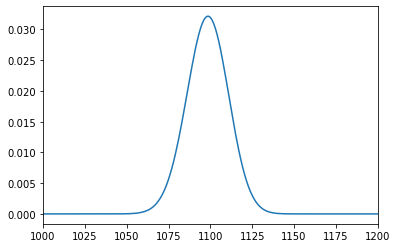

In [10]:
x = np.arange(0,n+1)
plt.plot(x,rv.pmf(x))
plt.xlim(1000,1200)

In [11]:
rv.ppf(1-0.975)

1074.0

(1000.0, 1200.0)

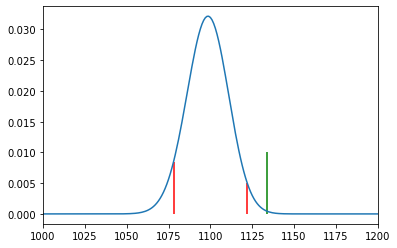

In [12]:
plt.plot(x,rv.pmf(x))
#plt.vlines([rv.ppf(0.05),rv.ppf(0.975)],0.015,0,'r')
a = np.linspace(1000,rv.ppf(0.05),200)
b = np.linspace(rv.ppf(0.975),1200,200)
plt.vlines(a,rv.pmf(a),0,'r')
plt.vlines(b,rv.pmf(b),0,'r')
plt.vlines(test_stat,0.01,0,'g')
plt.xlim(1000,1200)

Since the test statistic lies in the critical region ,we <b>reject</b> the null hypothesis

---

<b>Hypothesis 2:</b> Since the data is divided into 2 eras, old and new, we claim that the average age of an astronaut in both the eras is not the same.<br>
$H_0 : \mu_1 = \mu_2$<br>
$H_1 : \mu_1 \neq \mu_2$

In [13]:
old_era = df[df['year_of_mission']<=1990]
new_era = df[df['year_of_mission']>1990]

In [14]:
smpl1 = old_era['age'].sample(n=100)
Xbar1 = smpl1.mean()
S1 = np.sqrt(100/99*smpl1.var())


Calculating $\bar{X_1} , S_1 , \bar{X_2} , S_2$

In [15]:
smpl2 = new_era['age'].sample(n=100)
Xbar2 = smpl2.mean()
S2 = np.sqrt(100/99*smpl2.var())

The spool sample variance $S_p$

In [16]:
Sp = np.sqrt((99*S1**2 + 99*S2**2)/198) 


In [17]:
test_stat = (Xbar1-Xbar2)/np.sqrt(Sp*Sp*(2/100))
test_stat

-5.91909648078722

In [18]:
alpha = 0.05
t_alphaby2 = t(198).ppf(alpha/2)
t_alphaby2

-1.972017477833896

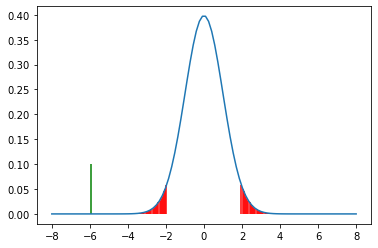

In [19]:
x = np.linspace(-8,8,100)
plt.plot(x,t(198).pdf(x))
a = np.linspace(-8,t_alphaby2,100)
b = np.linspace(-t_alphaby2,8,100)
plt.vlines(a,t(198).pdf(a),0,'r')
plt.vlines(b,t(198).pdf(b),0,'r')
plt.vlines(test_stat,0.1,0,'g')


Since the test statistic lies inside the critical region, we reject the null hypothesis.

<b>Hypothesis 3:</b> The probability of a male astronaut on a mission has changed while going from the old to the new era.<br>
$H_0 : \mu_1 = \mu_2$<br>
$H_1 : \mu_1 > \mu_2$<br>
Where $ \mu_1 and \mu_2$ are the mean of number of male astronauts in the old and new era respectively (considering a sample of 100)

In [20]:
df0 = df
df0['sex'].replace('male',1.,inplace=True)
df0['sex'].replace('female',0.,inplace=True)

In [21]:
old_era1 = df0[df0['year_of_mission']<=1990]
new_era1 = df0[df0['year_of_mission']>1990]

In [22]:
gen_era_old = [np.sum(old_era1['sex'].sample(n=20,replace=True)) for i in range(100)]
gen_era_new = [np.sum(new_era1['sex'].sample(n=20,replace=True)) for i in range(100)]

In [23]:
GXbar1 = np.mean(gen_era_old)
GS1 = np.sqrt(20/19*np.var(gen_era_old))
GXbar1,GS1

(19.06, 1.0343571611595799)

In [24]:
GXbar2 = np.mean(gen_era_new)
GS2 = np.sqrt(20/19*np.var(gen_era_new))
GXbar2,GS2

(17.04, 1.5955200439124277)

In [25]:
GSp = np.sqrt((GS1**2+GS2**2)/2)
GSp

1.3445406180864192

In [26]:
(GXbar1-GXbar2)/(GSp*np.sqrt(2/20))

4.750916995450378

In [27]:
t(198).ppf(0.990)

2.345328348533689

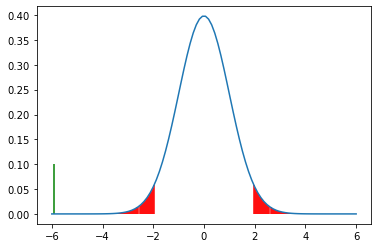

In [28]:
x = np.linspace(-6,6,100)
plt.plot(x,t(198).pdf(x))
a = np.linspace(-6,t_alphaby2,100)
b = np.linspace(-t_alphaby2,6,100)
plt.vlines(a,t(198).pdf(a),0,'r')
plt.vlines(b,t(198).pdf(b),0,'r')
plt.vlines(test_stat,0.1,0,'g')

The test statistic lies in the critical region, hence the null hypothesis is rejected.

Some conclusions: <br>
1. The probability that the astronaut is male in a particular mission is not 0.86
2. The true mean age of the astronauts in both the eras is not the same
3. The probability of the astronaut being a male is not the same in both the eras. In fact, it is less in the new era.Thus the number of female astronauts have increased.

# Relationship Between Two Variables
### We can guess that the age* and experience** of an astronaut would be related. But can we say that they are linearly related.
 
    * Age during the mission
    ** Years of experience from the difference between the year of mission and year of selection

Reading the dataset again and using the required data, i.e., age and experience.

In [29]:
data = pd.read_csv('astronauts.csv')
df = pd.DataFrame()
df['Name'] = data['name']
df['Age at Mission'] =  data['year_of_mission'] - data['year_of_birth']
df['Experiance'] =  data['year_of_mission'] - data['year_of_selection']

A glance at the dataframe.

In [30]:
df

,Name,Age at Mission,Experiance
0,"Gagarin, Yuri",27,1
1,"Titov, Gherman",26,1
2,"Glenn, John H., Jr.",41,3
3,"Glenn, John H., Jr.",77,39
4,"Carpenter, M. Scott",37,3
...,...,...,...
1272,"McClain, Anne Charlotte",39,5
1273,"Koch, Christina",40,6
1274,"Morgan, Andrew",43,6
1275,"Meir, Jessica",42,6


# Correlation 


In [37]:
df.corr()

,Age at Mission,Experiance
Age at Mission,1.000000,0.657102
Experiance,0.657102,1.000000


Making numpy arrays from the dataframe.

In [31]:
age = np.array(df['Age at Mission'])
XP = np.array(df['Experiance'])

# Defining functions to calculate point estimates

In [32]:
def b_1(x,y):#slope
    x_bar = x.mean()
    y_bar = y.mean()
    s_yx = 0
    s_xx = 0
    for i in range(len(x)):
        s_yx += (y[i]-y_bar)*(x[i] - x_bar)
        s_xx += (x[i] - x_bar)**2
    return s_yx/s_xx

def b_0(x,y):#intercept with y-axis
    m = b_1(x,y)
    x_bar = x.mean()
    y_bar = y.mean()
    return y_bar - m*x_bar

def R2(x,y):
    y_bar = y.mean()
    SSR=0
    SST=0
    m = b_1(x,y)
    c = b_0(x,y)
    for i in range(len(x)):
        SST += (y[i]-y_bar)**2
        SSR += (m*x[i]+c - y_bar)**2
    return SSR/SST

In [33]:
R2(age,XP)

0.4317830090180474

In [34]:
m = b_1(age,XP)
c = b_0(age,XP)

print('Point estimate of  of slope linear regression is =',m, '\n')
print('Point estimate of y- intercept of linear regression is =', c)
    


Point estimate of  of slope linear regression is = 0.5761651673754774 

Point estimate of y- intercept of linear regression is = -15.705495289365244


# Interval Estimates

In [35]:
def intervalEst(n, m, conf):
    samples = pd.DataFrame()
    b_0_list = []
    b_1_list = []
    
    for i in range(m):
        samples = df.sample(n = n)
        age = np.array(samples['Age at Mission'])
        XP = np.array(samples['Experiance'])
        b_0_list.append(b_0(age, XP))
        b_1_list.append(b_1(age, XP))
    
    b_0_list = np.array(b_0_list)
    b_1_list = np.array(b_1_list)
    '''plt.subplot(1,2,1)
    plt.hist(b_0_list)
    plt.subplot(1,2,2)
    plt.hist(b_1_list)'''
    print('Interval estimates of slope of linear regression with confidence interval ',conf,' is =',np.percentile(b_1_list,[(100-conf)/2,conf+(100-conf)/2]), '\n')
    print('Interval estimates of y- intercept of linear regression with confidence interval ',conf,' is =', np.percentile(b_0_list,[2.5,97.5]))
interact(intervalEst, n = (15, 100, 1), m = (50, 5000, 1), conf = (95,100,0.5));


interactive(children=(IntSlider(value=57, description='n', min=15), IntSlider(value=2525, description='m', max…

# Plot


Text(0, 0.5, 'Years of Experience')

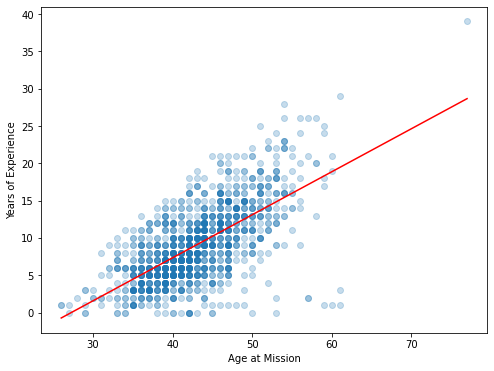

In [36]:
plt.figure(figsize = (8,6))
plt.scatter(age, XP, alpha = 0.25)
L = np.linspace(age.min(),age.max(),)
M = b_1(age,XP)*L  + b_0(age,XP)
plt.plot(L ,M, 'r')
plt.xlabel('Age at Mission')
plt.ylabel('Years of Experience')

# [Presentation Video Link](https://drive.google.com/file/d/1G1x7gndN0sbB2Gxn6iGuTZIDFDqAM__V/view?usp=sharing)